# Badanie relacji między punktami

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    a = (abs(x_lim[1]-x_lim[0]))*(abs(y_lim[1]-y_lim[0]))
    ex = intensity*a
    n = np.random.poisson(lam=ex, size=1)
    nn=n[0]
    x=np.random.rand(nn)*(x_lim[1]-x_lim[0])+x_lim[0]
    y=np.random.rand(nn)*(y_lim[1]-y_lim[0])+y_lim[0]
    p={"X":x.flatten(),"Y":y.flatten()}
    points=pd.DataFrame(p)
    return points

points_test=homogeneous_poisson_on_rectangle(20, [0,10], [0,10])
points_HP=pd.read_csv('dane_tymczasowe_HP 1.csv')
points_R=pd.read_csv('dane_tymczasowe_R 1.csv')
points_M=pd.read_csv('dane_tymczasowe_M 1.csv')

Funkcja G

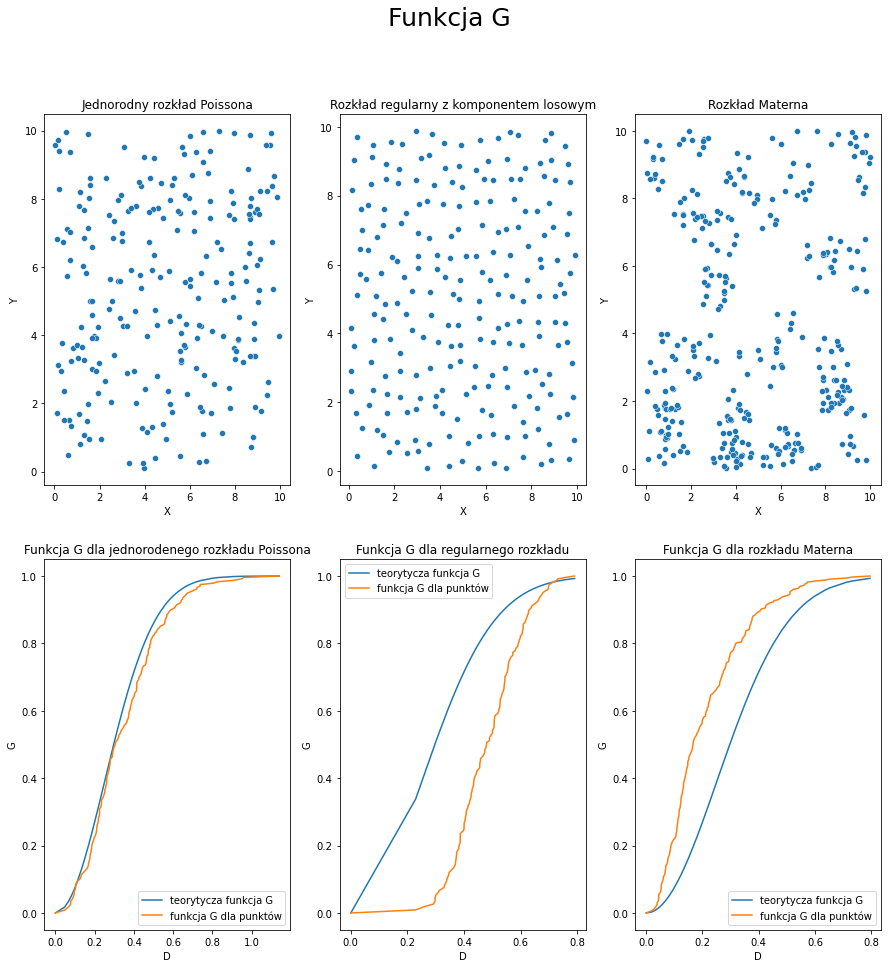

In [3]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    m=[]
    g=[]
    for i in range(points['X'].size):
        px0=points['X'][i]-points['X'].drop(i)
        py0=points['Y'][i]-points['Y'].drop(i)
        odl_pom=(px0**2+py0**2)**0.5
        m.append(odl_pom.min())
    m=np.sort(m)
    d=np.unique(m)
    ss=m.size
    for i in d:
        s=np.sum(m<=i)
        g.append(s/ss)
    d=np.insert(d,0,0.0)
    g.insert(0,0)
    return pd.DataFrame({"D":d, "G":g})
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    g=1-np.exp(-intensity*np.pi*d*d)
    return pd.DataFrame({"D":d, "G":g})

p_HP_g=g_function(points_HP)
p_R_g=g_function(points_R)
p_M_g=g_function(points_M)

p_HP_gp=g_function_poisson(p_HP_g["D"],2.5)
p_R_gp=g_function_poisson(p_R_g["D"],2.5)
p_M_gp=g_function_poisson(p_M_g["D"],2.5)

fig, ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle("Funkcja G", fontsize=25)

ax[0,0].set_title("Jednorodny rozkład Poissona")
sns.scatterplot(data=points_HP,x="X",y="Y",ax=ax[0,0])

ax[0,1].set_title("Rozkład regularny z komponentem losowym")
sns.scatterplot(data=points_R,x="X",y="Y",ax=ax[0,1])

ax[0,2].set_title("Rozkład Materna")
sns.scatterplot(data=points_M,x="X",y="Y",ax=ax[0,2])


ax[1,0].set_title("Funkcja G dla jednorodenego rozkładu Poissona")
sns.lineplot(data=p_HP_gp,x="D",y="G",ax=ax[1,0])
sns.lineplot(data=p_HP_g,x="D",y="G",ax=ax[1,0])
ax[1,0].legend(["teorytycza funkcja G","funkcja G dla punktów"])

ax[1,1].set_title("Funkcja G dla regularnego rozkładu")
sns.lineplot(data=p_R_gp,x="D",y="G",ax=ax[1,1])
sns.lineplot(data=p_R_g,x="D",y="G",ax=ax[1,1])
ax[1,1].legend(["teorytycza funkcja G","funkcja G dla punktów"])

ax[1,2].set_title("Funkcja G dla rozkładu Materna")
sns.lineplot(data=p_M_gp,x="D",y="G",ax=ax[1,2])
sns.lineplot(data=p_M_g,x="D",y="G",ax=ax[1,2])
ax[1,2].legend(["teorytycza funkcja G","funkcja G dla punktów"])

Funkcja F

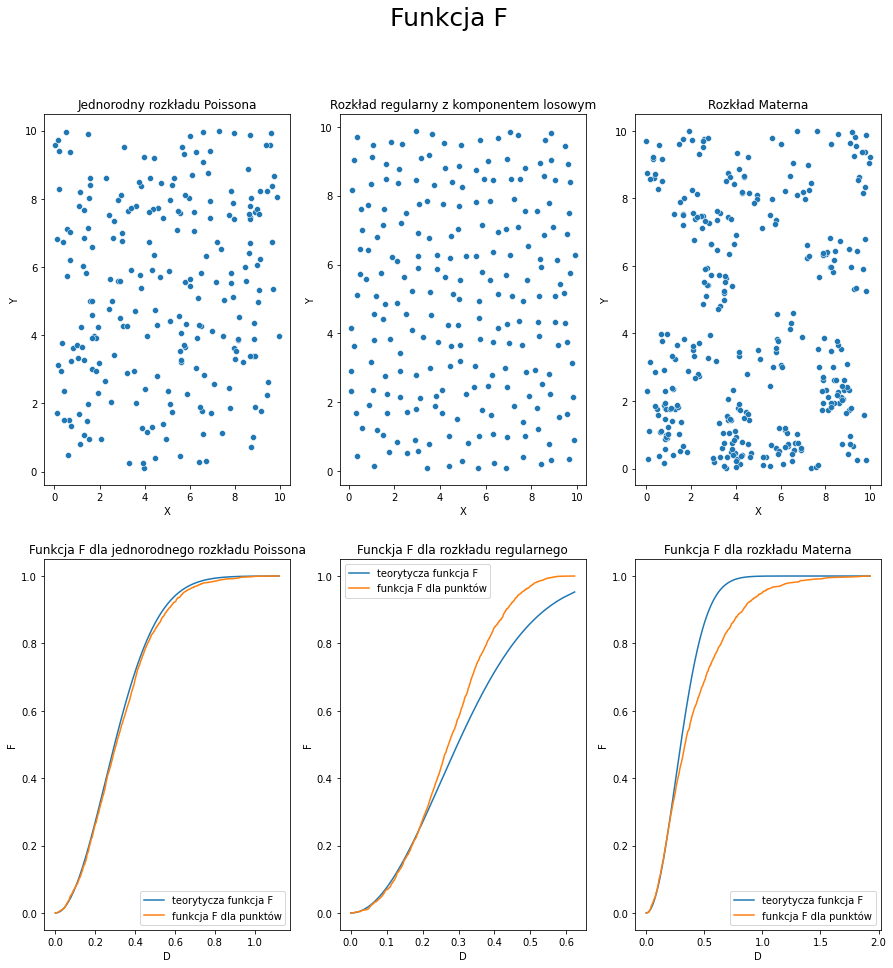

In [4]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    m = []
    g = []
    for i in range(test_points['X'].size):
        x_t = test_points["X"][i] - points["X"]
        y_t = test_points["Y"][i] - points["Y"]
        euk = (x_t**2 + y_t**2)**0.5
        m.append(euk.min())
    m=np.sort(m)
    d=np.unique(m)
    ss=m.size
    for i in d:
        s=np.sum(m<=i)
        g.append(s/ss)
    d=np.insert(d,0,0.0)
    g.insert(0,0)
    return pd.DataFrame({"D":d, "F":g})
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    g=1-np.exp(-intensity*np.pi*d*d)
    return pd.DataFrame({"D":d, "F":g})

p_HP_f=f_function(points_HP,points_test)
p_R_f=f_function(points_R,points_test)
p_M_f=f_function(points_M,points_test)

p_HP_fp=f_function_poisson(p_HP_f["D"],2.5)
p_R_fp=f_function_poisson(p_R_f["D"],2.5)
p_M_fp=f_function_poisson(p_M_f["D"],2.5)

fig, ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle("Funkcja F", fontsize=25)
ax[0,0].set_title("Jednorodny rozkładu Poissona")
sns.scatterplot(data=points_HP,x="X",y="Y",ax=ax[0,0])


ax[0,1].set_title("Rozkład regularny z komponentem losowym")
sns.scatterplot(data=points_R,x="X",y="Y",ax=ax[0,1])

ax[0,2].set_title("Rozkład Materna")
sns.scatterplot(data=points_M,x="X",y="Y",ax=ax[0,2])

ax[1,0].set_title("Funkcja F dla jednorodnego rozkładu Poissona")
sns.lineplot(data=p_HP_fp,x="D",y="F",ax=ax[1,0])
sns.lineplot(data=p_HP_f,x="D",y="F",ax=ax[1,0])
ax[1,0].legend(["teorytycza funkcja F","funkcja F dla punktów"])

ax[1,1].set_title("Funckja F dla rozkładu regularnego")
sns.lineplot(data=p_R_fp,x="D",y="F",ax=ax[1,1])
sns.lineplot(data=p_R_f,x="D",y="F",ax=ax[1,1])
ax[1,1].legend(["teorytycza funkcja F","funkcja F dla punktów"])

ax[1,2].set_title("Funkcja F dla rozkładu Materna")
sns.lineplot(data=p_M_fp,x="D",y="F",ax=ax[1,2])
sns.lineplot(data=p_M_f,x="D",y="F",ax=ax[1,2])
ax[1,2].legend(["teorytycza funkcja F","funkcja F dla punktów"])